# Training disconnected and connected patterns
In this notebook I will implement the next training scheme. First we will traing a couple of disconnected patterns with some space between them and then a sequence without space between them so that they can connect.

In [1]:
from __future__ import print_function
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

from network import BCPNN, NetworkManager
from data_transformer import build_ortogonal_patterns
from analysis_functions import calculate_angle_from_history
from analysis_functions import calculate_winning_pattern_from_distances, calculate_patterns_timings

%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

np.set_printoptions(suppress=True, precision=2)

#### Git
Then we run the git files

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '127d8b9e08a368243e1775da92c304e74fc551e7'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

## Network building and training

In [3]:
hypercolumns = 4
minicolumns = 10
n_patterns = 10  # Number of patterns

patterns_dic = build_ortogonal_patterns(hypercolumns, minicolumns)
patterns = list(patterns_dic.values())
patterns = patterns[:n_patterns]

# BCPNN network
nn = BCPNN(hypercolumns, minicolumns)

# Network manager
dt = 0.001
T_training = 1.0
training_time = np.arange(0, T_training + dt, dt)

T_rest = 1.0
time_rest = np.arange(0, T_rest + dt, dt)

values_to_save = ['o', 'a', 'z_pre', 'p_pre']
manager = NetworkManager(nn=nn, time=training_time, values_to_save=values_to_save)

Now we train the network with the different parameters

In [4]:
for pattern in patterns[0:6]:
    nn.k = 1.0
    manager.run_network(time=training_time, I=pattern)
    nn.k = 0.0
    manager.run_network(time=time_rest, I=None)

for pattern in patterns[6:]:
    nn.k = 1.0
    manager.run_network(time=training_time, I=pattern)


#### We plot the training

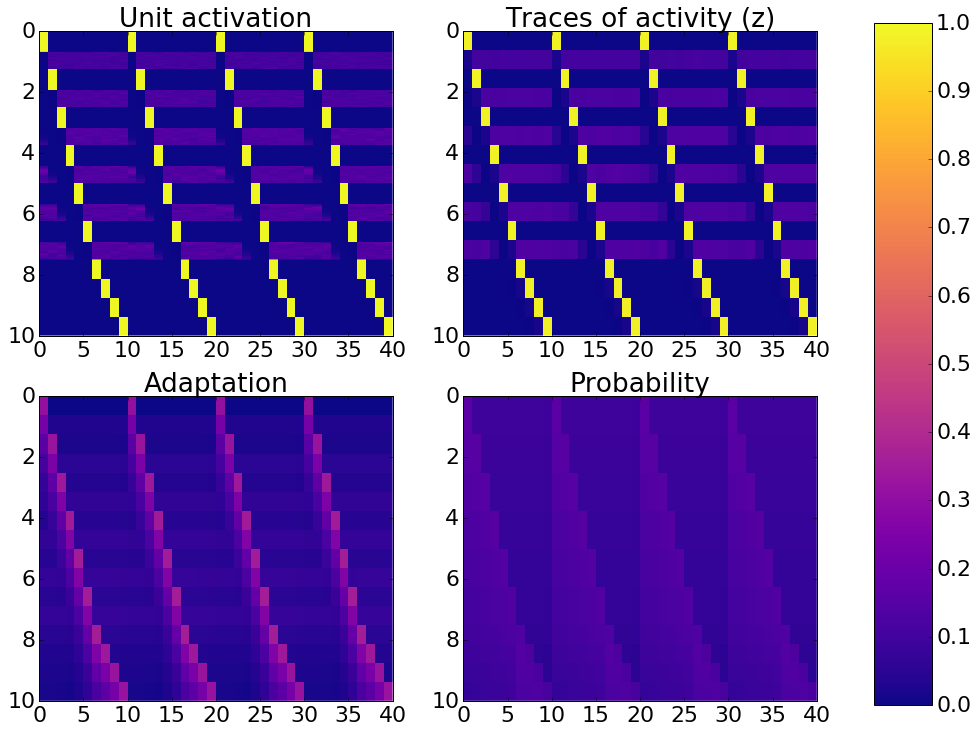

In [5]:
history = manager.history

cmap = 'plasma'
extent = [0, minicolumns * hypercolumns, n_patterns * T_training, 0]

fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(221)
im1 = ax1.imshow(history['o'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax1.set_title('Unit activation')

ax2 = fig.add_subplot(222)
im2 = ax2.imshow(history['z_pre'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax2.set_title('Traces of activity (z)')

ax3 = fig.add_subplot(223)
im3 = ax3.imshow(history['a'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax3.set_title('Adaptation')

ax4 = fig.add_subplot(224)
im4 = ax4.imshow(history['p_pre'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax4.set_title('Probability')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.12, 0.05, 0.79])
fig.colorbar(im1, cax=cbar_ax)

## Network recall

In [6]:
nn.k = 0
manager.empty_history()
T_recalling = 10.0
time_recalling = np.arange(0, T_recalling + dt, dt)

manager.run_network(time=time_recalling)

history = manager.history

#### Plot the recalling

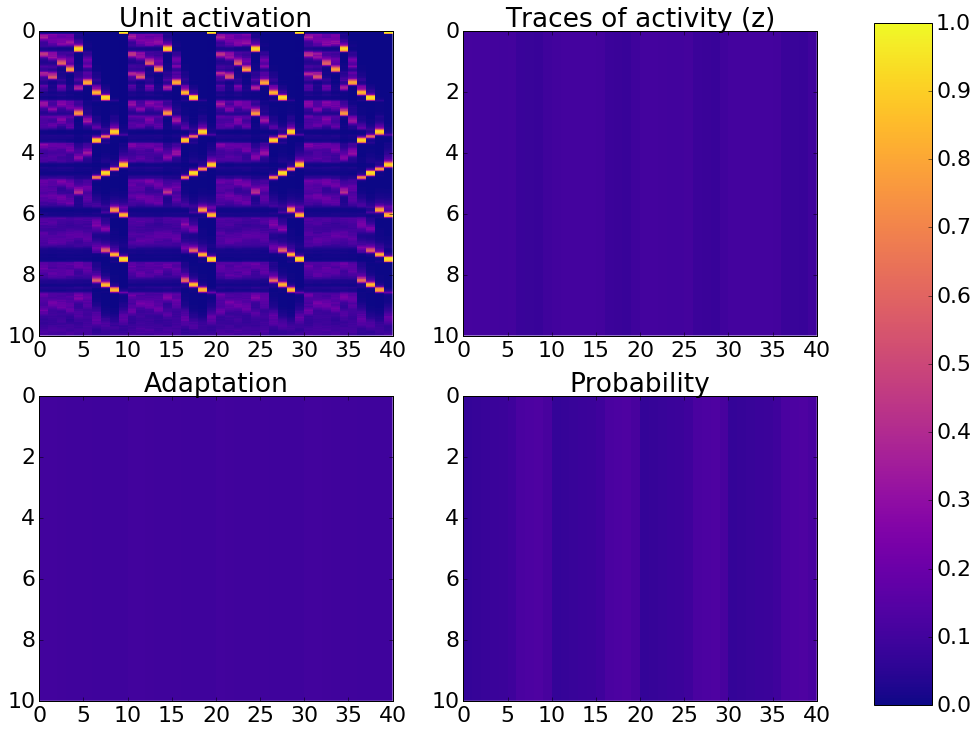

In [7]:
cmap = 'plasma'
extent = [0, minicolumns * hypercolumns, T_recalling, 0]

fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(221)
im1 = ax1.imshow(history['o'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax1.set_title('Unit activation')

ax2 = fig.add_subplot(222)
im2 = ax2.imshow(history['z_pre'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax2.set_title('Traces of activity (z)')

ax3 = fig.add_subplot(223)
im3 = ax3.imshow(history['a'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax3.set_title('Adaptation')

ax4 = fig.add_subplot(224)
im4 = ax4.imshow(history['p_pre'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax4.set_title('Probability')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.12, 0.05, 0.79])
fig.colorbar(im1, cax=cbar_ax)

#### Restore git

In [8]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])